In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#plt.style.use('ggplot')

In [13]:
%matplotlib inline

# Benchmark training plots

In [14]:
benchmark_last = pd.read_csv('./results/benchmark/history_last_layer.csv', index_col=[0])
benchmark_last.set_index(benchmark_last.index + 1, inplace=True)
benchmark_dense = pd.read_csv('./results/benchmark/history_all_dense_layers.csv', index_col=[0])
benchmark_dense.set_index(benchmark_dense.index + 1, inplace=True)
benchmark_conv_and_dense = pd.read_csv('./results/benchmark/history_dense_and_conv.csv', index_col=[0])
benchmark_conv_and_dense.set_index(benchmark_conv_and_dense.index + 1, inplace=True)

In [5]:
benchmark_loss_cols = [colname for colname in benchmark_conv_and_dense.columns if 'loss' in colname]
benchmark_top_1_error_cols = [colname for colname in benchmark_conv_and_dense.columns if '1_error' in colname]
benchmark_top_3_error_cols = [colname for colname in benchmark_conv_and_dense.columns if '3_error' in colname]

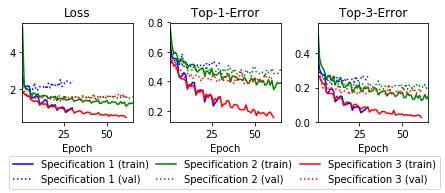

In [10]:
fig_benchmark, ax_benchmark = plt.subplots(nrows=1, ncols=3, figsize=(6.17,2.7))

pd.concat([benchmark_last[benchmark_loss_cols], 
           benchmark_dense[benchmark_loss_cols], 
           benchmark_conv_and_dense[benchmark_loss_cols]], axis=1).plot(ax=ax_benchmark[0],
                                                                        color= sorted(['b', 'g', 'r']*2), 
                                                                        style= ['-', ':'] * 3,
                                                                        legend=False)

pd.concat([benchmark_last[benchmark_top_1_error_cols], 
           benchmark_dense[benchmark_top_1_error_cols], 
           benchmark_conv_and_dense[benchmark_top_1_error_cols]], axis=1).plot(ax=ax_benchmark[1],
                                                                               color= sorted(['b', 'g', 'r']*2), 
                                                                               style= ['-', ':'] * 3, 
                                                                               legend=False)

pd.concat([benchmark_last[benchmark_top_3_error_cols], 
           benchmark_dense[benchmark_top_3_error_cols], 
           benchmark_conv_and_dense[benchmark_top_3_error_cols]], axis=1).plot(ax=ax_benchmark[2],
                                                                               color= sorted(['b', 'g', 'r']*2), 
                                                                               style= ['-', ':'] * 3, 
                                                                               legend=False)

for ax in ax_benchmark:
    ax.set_xlabel('Epoch')
    
ax_benchmark[0].set_title('Loss')
ax_benchmark[1].set_title('Top-1-Error')
ax_benchmark[2].set_title('Top-3-Error')

#ax_benchmark[0].set_ylim(1,4)
#ax_benchmark[1].set_ylim(0.25,1)
#ax_benchmark[2].set_ylim(0,0.75)

lines = ax_benchmark[0].legend().legendHandles
ax_benchmark[0].legend_.remove()

lgd = fig_benchmark.legend(lines, 
                     ('Specification 1 (train)', 'Specification 1 (val)', 'Specification 2 (train)', 'Specification 2 (val)', 'Specification 3 (train)', 'Specification 3 (val)'), 
                     bbox_to_anchor=(0.02, 0.09, 0.97, .102), loc=1, mode="expand", borderaxespad=0., ncol=3)

fig_benchmark.tight_layout()
fig_benchmark.subplots_adjust(bottom=0.35)
fig_benchmark.savefig('./results/benchmark/plots/loss_error_plot.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

# Analysis

In [29]:
display(benchmark_last.loc[benchmark_last['val_loss'].idxmin(),:])
print('Training stopped after {} epochs'.format(benchmark_last.shape[0]))

loss               1.647631
top_1_error        0.458841
top_3_error        0.196265
val_loss           1.916871
val_top_1_error    0.501157
val_top_3_error    0.221065
Name: 9, dtype: float64

Training stopped after 30 epochs


In [30]:
display(benchmark_dense.loc[benchmark_dense['val_loss'].idxmin(),:])
print('Training stopped after {} epochs'.format(benchmark_dense.shape[0]))

loss               1.332694
top_1_error        0.428846
top_3_error        0.170385
val_loss           1.455010
val_top_1_error    0.436571
val_top_3_error    0.204571
Name: 44, dtype: float64

Training stopped after 65 epochs


In [31]:
display(benchmark_conv_and_dense.loc[benchmark_conv_and_dense['val_loss'].idxmin(),:])
print('Training stopped after {} epochs'.format(benchmark_conv_and_dense.shape[0]))

loss               0.695915
top_1_error        0.238996
top_3_error        0.059073
val_loss           1.333819
val_top_1_error    0.397727
val_top_3_error    0.167045
Name: 40, dtype: float64

Training stopped after 61 epochs
